<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [38]:
import requests
import json
from tqdm.auto import tqdm
from collections import defaultdict
import pickle
import pandas as pd
import numpy as np
import math
from datetime import datetime, timedelta
import time
import matplotlib.pyplot as plt
import os
import glob
# !pip install plotly
import plotly.express as px
import seaborn as sns

In [2]:
#количество вакансий в россии 113- регион
page = 1
num_per_page = 100
url = f'https://api.hh.ru/vacancies?&area=113&page={page}&per_page={num_per_page}'
res = requests.get(url)
vacancies1 = res.json()
#Всего найдено вакансий
All_Vac = vacancies1.get('found')
print(All_Vac)

925920


In [43]:
s1 = ((vacancies1['errors'])[0])['captcha_url'] + '&backurl=' + 'http://127.0.0.1:8888/notebooks/Documents/DAWH/Progect/Untitled.ipynb'

In [44]:
s1

'https://hh.ru/account/captcha?state=pxvcxBozfu7ry7R4QCetFpRgByk-d8c77C_TwpAbKNKURyNV7jIN3ZmLkwVMlGAXRvl54bdk3quFTvFHP7WRWzkIeLnZACikDp0BA9168uLUHkZKX6muR3JsGf3OYNov&backurl=http://127.0.0.1:8888/notebooks/Documents/DAWH/Progect/Untitled.ipynb'

In [ ]:
&backurl=

In [3]:
url1 = f'https://api.hh.ru/dictionaries'
res1 = requests.get(url1)
rez = res1.json()

Получаем все индексы индустрий

In [4]:
url1 = f'https://api.hh.ru/industries'
res1 = requests.get(url1)
industry = res1.json()
dfindustry = pd.json_normalize(industry)
industries_list= (dfindustry.industries).to_list()
industries2 = []
for lns in industries_list:
    industries2 = industries2 + lns 
industries_df = pd.DataFrame(industries2)
industries_id = industries_df.id

Получаем все регионы

In [5]:
urlreg = f'https://api.hh.ru/areas'
resreg = requests.get(urlreg)
region = resreg.json()
region = pd.json_normalize(region)
region_list= (region.areas).to_list()
region2 = []
for reg in region_list:
    region2 = region2 + reg 
region_df = pd.DataFrame(region2)
region_id = region_df.id
region_id_rus = region_df[region_df['parent_id'] == '113'].id
region_df_rus = region_df[region_df['parent_id'] == '113']

In [6]:
len(region_df_rus)

89

In [7]:
reg1 = region_df_rus.copy()

In [8]:
reg1 = reg1.drop(['areas'],axis = 1)

In [19]:
reg1

,id,parent_id,name
0,1620,113,Республика Марий Эл
1,1624,113,Республика Татарстан
2,1646,113,Удмуртская Республика
3,1652,113,Чувашская Республика
4,1192,113,Забайкальский край
...,...,...,...
84,1553,113,Республика Калмыкия
85,2114,113,Республика Крым
86,1530,113,Ростовская область
87,6795,113,Киреевка


In [10]:
df = pd.DataFrame(reg1)
df.to_csv("regions.csv",sep=',',index=False)

In [11]:
industries_id1 = industries_id

In [12]:
region_df_rus.sort_values(by='id')

,id,parent_id,name,areas
21,1,113,Москва,[]
32,1008,113,Архангельская область,"[{'id': '14', 'parent_id': '1008', 'name': 'Ар..."
33,1020,113,Калининградская область,"[{'id': '1021', 'parent_id': '1020', 'name': '..."
40,1041,113,Республика Коми,"[{'id': '6188', 'parent_id': '1041', 'name': '..."
37,1051,113,Новгородская область,"[{'id': '5374', 'parent_id': '1051', 'name': '..."
...,...,...,...,...
14,2134,113,Донецкая область,"[{'id': '3238', 'parent_id': '2134', 'name': '..."
31,2155,113,Запорожская область,"[{'id': '3201', 'parent_id': '2155', 'name': '..."
72,2173,113,Луганская область,"[{'id': '3628', 'parent_id': '2173', 'name': '..."
88,2209,113,Херсонская область,"[{'id': '3506', 'parent_id': '2209', 'name': '..."


In [13]:
#Собираем список регионов и родительских регионов
regionID_Parent_ID = []
regionID = []
Parent_ID = []
reg_dicts = region_df_rus['areas']
for reg_dict in reg_dicts:
    el1 = [x.get('id') for x in reg_dict]
    el2 = [x.get('parent_id') for x in reg_dict]
    regionID = regionID + el1 
    Parent_ID = Parent_ID + el2
dict_reg_parent = {'area_name_id':regionID,'area_name_id_parent':Parent_ID}
regionID_Parent_ID = pd.DataFrame(dict_reg_parent)

In [49]:
a1 = 82
a2 = 85

region_id_rus1 = region_id_rus[a1:a2]
region_df_rus[a1:a2]

,id,parent_id,name,areas
82,2114,113,Республика Крым,"[{'id': '6692', 'parent_id': '2114', 'name': '..."
83,1530,113,Ростовская область,"[{'id': '1531', 'parent_id': '1530', 'name': '..."
84,6795,113,Киреевка,[]


In [50]:
region_id_rus1

82    2114
83    1530
84    6795
Name: id, dtype: object

In [159]:
time.sleep(20)


13    1704
Name: id, dtype: object

In [51]:
all_vacancy_ids = []
all_vacancy_full = []
today = datetime.now().date()
vac = 0
for reg in tqdm(region_id_rus1):
    file_name = reg + '.csv'
    time.sleep(0.1)
    url = f'https://api.hh.ru/vacancies?&area={reg}&page={page}&per_page={num_per_page}'
    res = requests.get(url)
    vacancies1 = res.json()
    #Всего найдено вакансий для региона
    All_Vac = vacancies1.get('found')
    if All_Vac < 2000:
        vac = vac + All_Vac
        vnum  = vacancies1.get('pages')
        print(All_Vac)
        for ii in range(vnum):
            url = f'https://api.hh.ru/vacancies?&area={reg}&page={ii}&per_page={num_per_page}'
            res = requests.get(url)
            vacancies = res.json()
            vacancy_ids = [el.get('id') for el in vacancies.get('items')]
            all_vacancy_full = all_vacancy_full + vacancies.get('items')
            all_vacancy_ids.extend(vacancy_ids)
    else:
        for ind in tqdm(industries_id1):
            url = f'https://api.hh.ru/vacancies?&area={reg}&industry={ind}&page={page}&per_page={num_per_page}'
            res = requests.get(url)
            vacancies1 = res.json()
            #Всего найдено вакансий для данной индустрии в этом регионе
            All_Vac = vacancies1.get('found')
            if All_Vac < 2000:
                vac = vac + All_Vac
                vnum  = vacancies1.get('pages')
                for ii in range(vnum):
                    url = f'https://api.hh.ru/vacancies?&area={reg}&industry={ind}&page={ii}&per_page={num_per_page}'
                    res = requests.get(url)
                    vacancies = res.json()
                    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
                    all_vacancy_full = all_vacancy_full + vacancies.get('items')
                    all_vacancy_ids.extend(vacancy_ids)
            else:
                daysrange = 14
                it_vac = 0
                for ids in range(daysrange):
                    date_to = str(today + timedelta(days=-ids))
                    ids1 = ids + 1
                    date_from = str(today + timedelta(days=-ids1))
                    publication_time = 'publication_time'
                    time.sleep(0.3)
                    url = f'https://api.hh.ru/vacancies?&area={reg}&industry={ind}&page={page}&per_page={num_per_page}&date_from={date_from}&date_to={date_to}&vacancy_search_order={publication_time}'
                    res = requests.get(url)
                    vacancies1 = res.json()
                    All_Vac2 = vacancies1.get('found')
                    vac = vac + All_Vac2
                    it_vac = it_vac + All_Vac2
                    vnum  = vacancies1.get('pages')
                    for ii in range(vnum):
                        url = f'https://api.hh.ru/vacancies?&area={reg}&industry={ind}&page={ii}&per_page={num_per_page}&date_from={date_from}&date_to={date_to}&vacancy_search_order={publication_time}'
                        res = requests.get(url)
                        vacancies = res.json()
                        vacancy_ids = [el.get('id') for el in vacancies.get('items')]
                        all_vacancy_full = all_vacancy_full + vacancies.get('items')
                        all_vacancy_ids.extend(vacancy_ids)
                    if it_vac == All_Vac:
                        break
    df = pd.DataFrame(all_vacancy_full)
    len(all_vacancy_full)
    all_vacancy_full = []
    df.to_csv(file_name,sep=',',index=False)
    #time.sleep(20)
                


1



сохранение остатков в файл при появлении капчи

In [ ]:
df = pd.DataFrame(all_vacancy_full)
df.to_csv(file_name,sep=',',index=False)

собираем все вакансии из файлов

In [28]:
names = glob.glob(r'C:\Users\alexz\Documents\DAWH\Progect\vac_by_reg\*.csv', recursive=True)
df = pd.concat([pd.read_csv(f).assign(user_id=i+1) for i,f in enumerate(names)],
               ignore_index=True)

<ipython-input-28-10223d9727bf>:2: DtypeWarning: Columns (10,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv(f).assign(user_id=i+1) for i,f in enumerate(names)],
<ipython-input-28-10223d9727bf>:2: DtypeWarning: Columns (10,16,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv(f).assign(user_id=i+1) for i,f in enumerate(names)],
<ipython-input-28-10223d9727bf>:2: DtypeWarning: Columns (3,10,16,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv(f).assign(user_id=i+1) for i,f in enumerate(names)],
<ipython-input-28-10223d9727bf>:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv(f).assign(user_id=i+1) for i,f in enumerate(names)],


In [29]:
#Убираем дубликаты
df2 = df.drop_duplicates()
len(df2)

601786

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601786 entries, 0 to 1460437
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        601786 non-null  int64  
 1   premium                   601786 non-null  bool   
 2   name                      601786 non-null  object 
 3   department                92633 non-null   object 
 4   has_test                  601786 non-null  bool   
 5   response_letter_required  601786 non-null  bool   
 6   area                      601786 non-null  object 
 7   salary                    472698 non-null  object 
 8   type                      601786 non-null  object 
 9   address                   364888 non-null  object 
 10  response_url              3163 non-null    object 
 11  sort_point_distance       0 non-null       float64
 12  published_at              601786 non-null  object 
 13  created_at                601786 non-null  

In [31]:
df2.head()

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,employer,snippet,contacts,schedule,working_days,working_time_intervals,working_time_modes,accept_temporary,immediate_redirect_url,user_id
0,71218889,False,Персональный водитель,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",NaN,"{'id': 'open', 'name': 'Открытая'}",NaN,...,"{'id': '8443', 'name': 'Райден', 'url': 'https...",{'requirement': 'Водительский стаж по правам н...,NaN,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,NaN,1
1,71390328,False,Стажер-менеджер по продукту,"{'id': 'ozonru-2180-commerce', 'name': 'Ozon О...",False,True,"{'id': '1', 'name': 'Москва', 'url': 'https://...",NaN,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Пресненская набе...",...,"{'id': '2180', 'name': 'Ozon', 'url': 'https:/...",{'requirement': 'Имеет высшее или неоконченное...,NaN,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,NaN,1
2,71021428,False,Менеджер по проведению собеседований,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 82000, 'to': 112000, 'currency': 'RUR...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Кривоколенный пе...",...,"{'id': '5144513', 'name': 'Конструктплюс', 'ur...","{'requirement': 'Опыт pабoты не важeн, всему н...",NaN,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,NaN,1
3,71423144,False,"Разработчик JavaScript, Доставка Маркетплейс","{'id': 'ozonru-2180-dev', 'name': 'Ozon Информ...",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",NaN,"{'id': 'open', 'name': 'Открытая'}",NaN,...,"{'id': '2180', 'name': 'Ozon', 'url': 'https:/...",{'requirement': 'Уверенное знание нативного Ja...,NaN,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,NaN,1
4,71390128,False,Контролер технического состояния автотранспорт...,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 70000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'улица Подольских...",...,"{'id': '4232036', 'name': 'СберЛогистика', 'ur...","{'requirement': 'Высшее образование, не ниже с...",NaN,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,NaN,1


In [32]:
df2.columns

Index(['id', 'premium', 'name', 'department', 'has_test',
       'response_letter_required', 'area', 'salary', 'type', 'address',
       'response_url', 'sort_point_distance', 'published_at', 'created_at',
       'archived', 'apply_alternate_url', 'insider_interview', 'url',
       'adv_response_url', 'alternate_url', 'relations', 'employer', 'snippet',
       'contacts', 'schedule', 'working_days', 'working_time_intervals',
       'working_time_modes', 'accept_temporary', 'immediate_redirect_url',
       'user_id'],
      dtype='object')

In [33]:
#Собираем датафрейм с целевыми колонками
datas = df2[['id','name','area','salary','employer','schedule','snippet']]
datas = datas.reset_index()
#достаем подколонки из датафрейма
datas_area = datas['area']
datas_salary = datas['salary']
datas_employer = datas['employer']
datas_schedule = datas['schedule']
#Зарплаты
salary_from = []
salary_to = []
salary_currency = []
salary_gross = []
for datas_salary1 in datas_salary:
    if isinstance(datas_salary1, str):
        salary_from.append(eval(datas_salary1).get('from'))
        salary_to.append(eval(datas_salary1).get('to'))
        salary_currency.append(eval(datas_salary1).get('currency'))
        salary_gross.append(eval(datas_salary1).get('gross'))
    else:
        salary_from.append(float('nan'))
        salary_to.append(float('nan'))
        salary_currency.append(float('nan'))
        salary_gross.append(float('nan'))
#работодатели
employer_id = []
employer_name = []
for datas_employer1 in datas_employer:
    employer_id.append(eval(datas_employer1).get('id'))
    employer_name.append(eval(datas_employer1).get('name'))
#режим работы
schedule_id = []
schedule_name = []
for datas_schedule1 in datas_schedule:
    schedule_id.append(eval(datas_schedule1).get('id'))
    schedule_name.append(eval(datas_schedule1).get('name'))




In [40]:
datas_area[250000]

"{'id': '95', 'name': 'Тюмень', 'url': 'https://api.hh.ru/areas/95'}"

In [41]:
#регион
area_name_id = []
area_name = []
for datas_area1 in datas_area:
    area_name_id.append(eval(datas_area1).get('id'))
    area_name.append(eval(datas_area1).get('name'))


In [44]:
len(set(area_name_id))

3735

In [ ]:
#Собираем новый датафрейм с целевыми столбцами
datas['area_name_id'] = area_name_id
datas['area_name'] = area_name
datas['salary_from'] = salary_from
datas['salary_to'] = salary_to
datas['salary_currency'] = salary_currency
datas['salary_gross'] = salary_gross
datas['employer_id'] = employer_id
datas['employer_name'] = employer_name
datas['schedule_id'] = schedule_id
datas['schedule_name'] = schedule_name

In [226]:
datas = datas.drop(['index'],axis = 1)
datas_new = datas.copy()
datas_new = datas.drop(['area','salary','employer','snippet','schedule'],axis = 1)
datas_new=datas_new.drop_duplicates()

In [257]:
file_name = 'vac_area_salary_emp_sched.csv'
datas_new.to_csv(file_name,sep=',',index=False)

In [ ]:
datas_new = pd.read_csv('vac_area_salary_emp_sched.csv',
                   sep=',')

In [249]:
datas_salary = datas_new.copy()
datas_salary = datas_salary.dropna(subset=['salary_from', 'salary_to'],how='all')

In [250]:
datas_salary

,id,name,area_name_id,area_name,salary_from,salary_to,salary_currency,salary_gross,employer_id,employer_name,schedule_id,schedule_name
2,71021428,Менеджер по проведению собеседований,1,Москва,82000.0,112000.0,RUR,False,5144513,Конструктплюс,fullDay,Полный день
4,71390128,Контролер технического состояния автотранспорт...,1,Москва,70000.0,NaN,RUR,True,4232036,СберЛогистика,fullDay,Полный день
6,71370931,Специалист по персоналу (КДП),1,Москва,NaN,110000.0,RUR,True,4232036,СберЛогистика,fullDay,Полный день
7,71395056,Диспетчер транспортного отдела,1,Москва,65500.0,NaN,RUR,True,4232036,СберЛогистика,shift,Сменный график
10,70044987,Администратор в бельевую (Кастелянша) в общежи...,1,Москва,40000.0,40000.0,RUR,False,5116221,Эм Рент,fullDay,Полный день
...,...,...,...,...,...,...,...,...,...,...,...,...
601764,69952579,Монтажник слаботочных систем,130,Севастополь,NaN,80000.0,RUR,True,1898133,АйСи Сервис,fullDay,Полный день
601768,70913149,Монтажник,131,Симферополь,60000.0,NaN,RUR,True,1898133,АйСи Сервис,fullDay,Полный день
601774,70853192,Инженер группы строительства ВОЛС,2116,Керчь,47500.0,57500.0,RUR,True,1898133,АйСи Сервис,fullDay,Полный день
601783,70993186,Менеджер по работе с ключевыми клиентами,131,Симферополь,36000.0,50400.0,RUR,True,1898133,АйСи Сервис,fullDay,Полный день


In [251]:
datas_NO_salary = pd.concat([datas_salary,datas_new]).drop_duplicates(keep=False)

In [252]:
datas_NO_salary

,id,name,area_name_id,area_name,salary_from,salary_to,salary_currency,salary_gross,employer_id,employer_name,schedule_id,schedule_name
0,71218889,Персональный водитель,1,Москва,NaN,NaN,NaN,NaN,8443,Райден,fullDay,Полный день
1,71390328,Стажер-менеджер по продукту,1,Москва,NaN,NaN,NaN,NaN,2180,Ozon,fullDay,Полный день
3,71423144,"Разработчик JavaScript, Доставка Маркетплейс",1,Москва,NaN,NaN,NaN,NaN,2180,Ozon,fullDay,Полный день
5,71401640,Коммерческий директор макрорегиона,1,Москва,NaN,NaN,NaN,NaN,4352,Почта России,fullDay,Полный день
8,71391092,Стажер-менеджер проектов (СНГ),1,Москва,NaN,NaN,NaN,NaN,2180,Ozon,fullDay,Полный день
...,...,...,...,...,...,...,...,...,...,...,...,...
601779,70866530,Инженер группы эксплуатации сети,131,Симферополь,NaN,NaN,NaN,NaN,1898133,АйСи Сервис,shift,Сменный график
601780,69536507,Руководитель группы продавцов,131,Симферополь,NaN,NaN,NaN,NaN,1898133,АйСи Сервис,fullDay,Полный день
601781,70819918,Менеджер по продажам,131,Симферополь,NaN,NaN,NaN,NaN,1898133,АйСи Сервис,fullDay,Полный день
601782,70081963,Специалист (группа по управлению клиентским оп...,131,Симферополь,NaN,NaN,NaN,NaN,1898133,АйСи Сервис,fullDay,Полный день


In [4]:
len(datas_new)

581859

In [5]:
len(datas_NO_salary) + len(datas_salary)


581859

In [255]:
#Сохраняем промежуточные файлы с данными с ЗП и без ЗП
file_name = 'datas_NO_salary.csv'
datas_NO_salary.to_csv(file_name,sep=',',index=False)
file_name = 'datas_salary.csv'
datas_salary.to_csv(file_name,sep=',',index=False)

In [13]:
#Подгружаем промежуточные данные для обработки
datas_NO_salary = pd.read_csv('datas_NO_salary.csv',
                   sep=',')
datas_salary = pd.read_csv('datas_salary.csv',
                   sep=',')
datas_new = pd.read_csv('vac_area_salary_emp_sched.csv',
                   sep=',')

сердняя вилка

In [37]:
#смотрим соотношение зарпла до вычета к зарплатам на руки
Data_salary_gross = datas_salary.groupby(by=['salary_gross'])['salary_from','salary_to'].count().reset_index()
Data_salary_gross

<ipython-input-37-5cdbf8cc01d5>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Data_salary_gross = datas_salary.groupby(by=['salary_gross'])['salary_from','salary_to'].count().reset_index()


,salary_gross,salary_from,salary_to
0,False,239807,135036
1,True,182586,119552


In [38]:
#Вычитаем из зарплат НДФЛ (там где гросс)
Data_salary_net = datas_salary.copy()
Data_salary_net.loc[(Data_salary_net['salary_gross'] == True), 'salary_from'] = (Data_salary_net['salary_from'] * 0.87)
Data_salary_net.loc[(Data_salary_net['salary_gross'] == True), 'salary_to'] = (Data_salary_net['salary_to'] * 0.87)

In [39]:
#Проверяем какие валюты попали в выборку
Data_salary_currency = datas_salary.groupby(by=['salary_currency'])['salary_from','salary_to'].count().reset_index()
Data_salary_currency

<ipython-input-39-b6396c82735e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Data_salary_currency = datas_salary.groupby(by=['salary_currency'])['salary_from','salary_to'].count().reset_index()


,salary_currency,salary_from,salary_to
0,BYR,4,4
1,EUR,106,101
2,KZT,20,11
3,RUR,422544,254323
4,USD,354,257
5,UZS,2,0


In [40]:
#курсы валют (можно попробовать замеить на загруженный курс валют с биржи на сегодня)
BYRRUR = 24.24
EURRUR = 61.31
KZTRUR = 0.13
USDRUR = 61.5
UZSRUR = 0.0055

In [41]:
#Переводим все зарплаты в рубли
Data_salary_net_RUR = Data_salary_net.copy()
Data_salary_net_RUR.loc[(Data_salary_net_RUR['salary_currency'] == 'BYR'), 'salary_from'] = (Data_salary_net_RUR['salary_from'] * BYRRUR)
Data_salary_net_RUR.loc[(Data_salary_net_RUR['salary_currency'] == 'BYR'), 'salary_to'] = (Data_salary_net_RUR['salary_to'] * BYRRUR)
Data_salary_net_RUR.loc[(Data_salary_net_RUR['salary_currency'] == 'EUR'), 'salary_from'] = (Data_salary_net_RUR['salary_from'] * EURRUR)
Data_salary_net_RUR.loc[(Data_salary_net_RUR['salary_currency'] == 'EUR'), 'salary_to'] = (Data_salary_net_RUR['salary_to'] * EURRUR)
Data_salary_net_RUR.loc[(Data_salary_net_RUR['salary_currency'] == 'KZT'), 'salary_from'] = (Data_salary_net_RUR['salary_from'] * KZTRUR)
Data_salary_net_RUR.loc[(Data_salary_net_RUR['salary_currency'] == 'KZT'), 'salary_to'] = (Data_salary_net_RUR['salary_to'] * KZTRUR)
Data_salary_net_RUR.loc[(Data_salary_net_RUR['salary_currency'] == 'USD'), 'salary_from'] = (Data_salary_net_RUR['salary_from'] * USDRUR)
Data_salary_net_RUR.loc[(Data_salary_net_RUR['salary_currency'] == 'USD'), 'salary_to'] = (Data_salary_net_RUR['salary_to'] * USDRUR)
Data_salary_net_RUR.loc[(Data_salary_net_RUR['salary_currency'] == 'UZS'), 'salary_from'] = (Data_salary_net_RUR['salary_from'] * UZSRUR)
Data_salary_net_RUR.loc[(Data_salary_net_RUR['salary_currency'] == 'UZS'), 'salary_to'] = (Data_salary_net_RUR['salary_to'] * UZSRUR)
Data_salary_net_RUR.loc[(Data_salary_net_RUR['salary_currency'] == 'UZS'), 'salary_to'] = (Data_salary_net_RUR['salary_to'] * UZSRUR)
Data_salary_net_RUR['salary_currency'] = 'RUR'

In [42]:
Data_salary_net_RUR_currency = Data_salary_net_RUR.groupby(by=['salary_currency'])['salary_from','salary_to'].count().reset_index()
Data_salary_net_RUR_currency

<ipython-input-42-f62cded7f814>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Data_salary_net_RUR_currency = Data_salary_net_RUR.groupby(by=['salary_currency'])['salary_from','salary_to'].count().reset_index()


,salary_currency,salary_from,salary_to
0,RUR,423030,254696


In [72]:
regionID_Parent_ID = regionID_Parent_ID.astype({"area_name_id":"int64"})
#regionID_Parent_ID = regionID_Parent_ID.astype({"area_name_id_parent":"int64"})
Df_parent = Data_salary_net_RUR.merge(regionID_Parent_ID, left_on='area_name_id', right_on='area_name_id', how='left')
Df_parent["area_name_id_parent"] = Df_parent["area_name_id_parent"].fillna(Df_parent["area_name_id"])

In [94]:
Df_parent2=Df_parent.copy()
Df_parent2["salary_mean"] = np.where(pd.isna(Df_parent2["salary_from"]),Df_parent2["salary_to"], (Df_parent2["salary_to"]+Df_parent2["salary_from"])/2)
Df_parent2.loc[(pd.isna(Df_parent2["salary_mean"])), "salary_mean"]=Df_parent2["salary_from"]

In [101]:
Df_parent = Df_parent2[["id","name","area_name_id_parent","area_name","salary_from","salary_to","salary_mean","employer_id","employer_name","schedule_id","schedule_name"]]
Df_parent

,id,name,area_name_id_parent,area_name,salary_from,salary_to,salary_mean,employer_id,employer_name,schedule_id,schedule_name
0,71021428,Менеджер по проведению собеседований,1,Москва,82000.0,112000.0,97000.0,5144513.0,Конструктплюс,fullDay,Полный день
1,71390128,Контролер технического состояния автотранспорт...,1,Москва,60900.0,NaN,60900.0,4232036.0,СберЛогистика,fullDay,Полный день
2,71370931,Специалист по персоналу (КДП),1,Москва,NaN,95700.0,95700.0,4232036.0,СберЛогистика,fullDay,Полный день
3,71395056,Диспетчер транспортного отдела,1,Москва,56985.0,NaN,56985.0,4232036.0,СберЛогистика,shift,Сменный график
4,70044987,Администратор в бельевую (Кастелянша) в общежи...,1,Москва,40000.0,40000.0,40000.0,5116221.0,Эм Рент,fullDay,Полный день
...,...,...,...,...,...,...,...,...,...,...,...
458592,69952579,Монтажник слаботочных систем,2114,Севастополь,NaN,69600.0,69600.0,1898133.0,АйСи Сервис,fullDay,Полный день
458593,70913149,Монтажник,2114,Симферополь,52200.0,NaN,52200.0,1898133.0,АйСи Сервис,fullDay,Полный день
458594,70853192,Инженер группы строительства ВОЛС,2114,Керчь,41325.0,50025.0,45675.0,1898133.0,АйСи Сервис,fullDay,Полный день
458595,70993186,Менеджер по работе с ключевыми клиентами,2114,Симферополь,31320.0,43848.0,37584.0,1898133.0,АйСи Сервис,fullDay,Полный день


In [133]:
#Сохраняем промежуточные файлы с данными с ЗП и без ЗП
file_name = 'Df_parent.csv'
Df_parent.to_csv(file_name,sep=',',index=False)

In [169]:
#готовый датафрейм для построения графиков
Df_parent = pd.read_csv('Df_parent.csv',
                   sep=',')

In [171]:
Df_parent.groupby(by=['area_name'])['salary_from','salary_to',"salary_mean"].mean().reset_index()

<ipython-input-171-a8e0c59783c3>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,area_name,salary_from,salary_to,salary_mean
0,Абадзехская,20941.500000,28275.000000,22126.875000
1,Абаза,71711.578947,45535.000000,70794.761905
2,Абакан,53716.403286,68644.694726,58775.375281
3,Абан,67738.272727,155600.000000,82783.727273
4,Абатское,31765.800000,50658.800000,39846.757143
...,...,...,...,...
3629,посёлок Биокомбината,33333.599091,42263.333333,38955.816250
3630,посёлок Володарского (Московская область),54098.509412,66130.500000,57500.438421
3631,посёлок Память Парижской Коммуны,30529.496250,44987.178000,36136.428750
3632,посёлок имени Морозова,32354.625000,36950.671875,35909.375000


In [23]:
reg1[["id","name"]]

,id,name
0,1620,Республика Марий Эл
1,1624,Республика Татарстан
2,1646,Удмуртская Республика
3,1652,Чувашская Республика
4,1192,Забайкальский край
...,...,...
84,1553,Республика Калмыкия
85,2114,Республика Крым
86,1530,Ростовская область
87,6795,Киреевка


In [24]:
#Распределение зарплат и вилок зарплат по регионам
Data_salary_net_RUR_area = Df_parent.groupby(by=['area_name_id_parent'])['salary_from','salary_to',"salary_mean"].mean().reset_index()
Data_salary_net_RUR_area = np.round(Data_salary_net_RUR_area, 2)
Data_salary_net_RUR_area

<ipython-input-24-7b98ca07c228>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Data_salary_net_RUR_area = Df_parent.groupby(by=['area_name_id_parent'])['salary_from','salary_to',"salary_mean"].mean().reset_index()


,area_name_id_parent,salary_from,salary_to,salary_mean
0,1,70531.04,97972.16,80931.74
1,2,58629.36,80640.78,66451.49
2,145,45746.51,56934.97,51110.72
3,1008,46807.23,60489.11,52084.40
4,1020,43424.03,58544.75,48292.89
...,...,...,...,...
78,1982,55570.76,106575.18,68312.30
79,1985,60033.18,119611.42,71900.49
80,2019,53919.09,70605.40,60116.32
81,2114,46811.62,70102.54,53128.69


In [2]:
file_name = 'Data_salary_net_RUR_area1.csv'
Data_salary_net_RUR_area.to_csv(file_name,sep=',',index=False)
Data_salary_net_RUR_area = pd.read_csv('Data_salary_net_RUR_area1.csv',
                   sep=',')

NameError: name 'Data_salary_net_RUR_area' is not defined

In [3]:
Data_salary_net_RUR_area = pd.read_csv('Data_salary_net_RUR_area1.csv',
                   sep=',')

In [10]:
#Распределение зарплат и вилок зарплат по компаниям
Data_salary_net_RUR_employer = Df_parent.groupby(by=['employer_name'])['salary_from','salary_to',"salary_mean"].mean().reset_index()
Data_salary_net_RUR_employer = np.round(Data_salary_net_RUR_employer, 2)
Data_salary_net_RUR_employer_no = Df_parent.groupby(by=['employer_name'])["id"].count().reset_index()
Data_salary_net_RUR_employer_no.rename(columns = {'id':'count'}, inplace =True)
Data_salary_net_RUR_employer = Data_salary_net_RUR_employer.merge(Data_salary_net_RUR_employer_no, left_on='employer_name', right_on='employer_name', how='left')
Data_salary_net_RUR_employer

<ipython-input-10-6cd39a43034a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Data_salary_net_RUR_employer = Df_parent.groupby(by=['employer_name'])['salary_from','salary_to',"salary_mean"].mean().reset_index()


,employer_name,salary_from,salary_to,salary_mean,count
0,DANTONE HOME,92500.00,163333.33,118333.33,9
1,ЗАВОД КриалЭнергоСтрой,87666.67,66666.67,90166.67,12
2,Хоум Отель,37000.00,47000.00,42000.00,1
3,Центр развития персонала Успех,58050.00,65733.33,59300.00,4
4,#BEERy ВЫХОДНОЙ (ИП Абдугапирова Шахла Адилбек...,32000.00,62000.00,47000.00,1
...,...,...,...,...,...
39607,школа бизнеса в сфере логистики МЕГА Логистика,32500.00,42500.00,37500.00,2
39608,эдмин,130500.00,174000.00,152250.00,3
39609,яМайка,43483.33,64716.67,54100.00,3
39610,“ВЕРТОЛ-ДЕВЕЛОПМЕНТ”,45000.00,NaN,45000.00,1


In [60]:
data_file = Data_salary_net_RUR_employer[["salary_mean","count"]]

In [65]:
data_file

,salary_mean,count
0,118333.33,9
1,90166.67,12
2,42000.00,1
3,59300.00,4
4,47000.00,1
...,...,...
39607,37500.00,2
39608,152250.00,3
39609,54100.00,3
39610,45000.00,1


In [116]:
from sklearn.preprocessing import StandardScaler
import numpy as np
X=data_file.values[:,0:]
X=np.nan_to_num(X)
Clus_dataSet=StandardScaler().fit_transform(X)

In [115]:
data_file.values[:,0:]


array([[1.1833333e+05, 9.0000000e+00, 0.0000000e+00],
       [9.0166670e+04, 1.2000000e+01, 0.0000000e+00],
       [4.2000000e+04, 1.0000000e+00, 0.0000000e+00],
       ...,
       [5.4100000e+04, 3.0000000e+00, 0.0000000e+00],
       [4.5000000e+04, 1.0000000e+00, 0.0000000e+00],
       [5.8350000e+04, 3.0000000e+00, 0.0000000e+00]])

In [138]:
from sklearn.cluster import KMeans
clasterNum=20
k_maens = KMeans(init="k-means++",n_clusters=clasterNum,n_init=12)
k_maens.fit(Clus_dataSet)
labels=k_maens.labels_

In [139]:
data_file['Class_kl'] = labels

<ipython-input-139-9327799acb9e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [140]:
data_file.groupby(by=['Class_kl'])['salary_mean'].count()

Class_kl
0     5651
1      260
2        1
3     1003
4     4429
5        4
6        1
7        5
8     9506
9     6647
10     148
11    2043
12     199
13       1
14       9
15     109
16     709
17      38
18    8821
19      28
Name: salary_mean, dtype: int64

In [141]:
Data_salary_net_RUR_employer['Class_kl'] = labels

In [173]:
Data_salary_net_RUR_employer.loc[Data_salary_net_RUR_employer['Class_kl'] == 14]

,employer_name,salary_from,salary_to,salary_mean,count,Class_kl
1703,FIX PRICE,29813.49,34513.89,32079.93,2524,14
11683,ГБУЗ ТО Областная больница №4 (г.Ишим),60733.33,NaN,60733.33,2280,14
13691,"ДИКСИ, группа компаний",47299.14,41794.23,42457.59,2129,14
14106,Департамент Ф53,65722.94,81153.92,73752.33,2555,14
17697,Квазар,59068.07,100006.20,81520.66,4422,14
19953,"Лента, федеральная розничная сеть",30237.70,38279.99,34072.30,1839,14
26609,Почта России,26922.11,31394.14,28741.50,2700,14
28608,Ростелеком,35413.62,50920.29,39201.75,2815,14
28993,СБЕР,41646.08,109504.81,42676.79,3046,14


In [145]:
Data_salary_net_RUR_employer.loc[Data_salary_net_RUR_employer['Class_kl'] == 7]

,employer_name,salary_from,salary_to,salary_mean,count,Class_kl
5150,Wincent capital,500000.00,2000000.00,1250000.00,1,7
5979,АН КЕНСИНГТОН,100000.00,2000000.00,1050000.00,1,7
10767,Винсент Недвижимость,519195.65,1588055.56,924489.13,23,7
19908,Лейтон недвижимость,300000.00,2800000.00,1550000.00,1,7
30490,Сереброфф,870000.00,NaN,870000.00,1,7


In [146]:
Data_salary_net_RUR_employer.loc[Data_salary_net_RUR_employer['Class_kl'] == 6]

,employer_name,salary_from,salary_to,salary_mean,count,Class_kl
29848,Салон красоты,1600191.0,6400764.0,4000477.5,1,6


In [159]:
Data_salary_net_RUR_employer.loc[Data_salary_net_RUR_employer['Class_kl'] == 19]

,employer_name,salary_from,salary_to,salary_mean,count,Class_kl
531,ArtVolkov.ru,350000.00,550000.00,450000.00,1,19
548,Aston,NaN,435000.00,435000.00,2,19
767,Behavox,454792.50,588555.00,521673.75,4,19
1641,Evklead,NaN,435000.00,435000.00,1,19
1775,Finector,NaN,615000.00,615000.00,1,19
1863,FriendlyHome,300000.00,1000000.00,650000.00,1,19
1974,Gauss Money,267525.00,483393.75,449953.12,2,19
2970,Luminati,430500.00,461250.00,445875.00,1,19
4033,RedCloudLab,306500.00,834166.67,570333.33,3,19
4527,StaffRecruitment,565316.67,NaN,565316.67,12,19


In [165]:
data_file

,salary_mean,count,Class_kl
0,118333.33,9,11
1,90166.67,12,4
2,42000.00,1,8
3,59300.00,4,18
4,47000.00,1,8
...,...,...,...
39607,37500.00,2,8
39608,152250.00,3,11
39609,54100.00,3,18
39610,45000.00,1,8


In [168]:
fig = px.scatter(Data_salary_net_RUR_employer, x="count", y="salary_mean", color="Class_kl")
fig.show()

In [11]:
(Data_salary_net_RUR_employer.sort_values(by=["count"], ascending=False)).head(25)

,employer_name,salary_from,salary_to,salary_mean,count
27370,Пятёрочка,29098.96,37565.76,33482.84,26503
20416,"МАГНИТ, Розничная сеть",29589.76,37999.02,34327.93,12994
33921,Тинькофф,42096.32,70565.38,44568.88,8701
18618,Консалтинг Групп,95890.90,100767.17,98289.17,6884
3571,Ozon,66042.79,164469.58,80808.32,6709
39491,Яндекс,29570.01,47676.89,36500.08,6092
17697,Квазар,59068.07,100006.20,81520.66,4422
28993,СБЕР,41646.08,109504.81,42676.79,3046
28608,Ростелеком,35413.62,50920.29,39201.75,2815
26609,Почта России,26922.11,31394.14,28741.50,2700


In [12]:
(Data_salary_net_RUR_employer.sort_values(by=["salary_mean"], ascending=False)).head(25)

,employer_name,salary_from,salary_to,salary_mean,count
29848,Салон красоты,1600191.00,6400764.00,4000477.50,1
19908,Лейтон недвижимость,300000.00,2800000.00,1550000.00,1
5150,Wincent capital,500000.00,2000000.00,1250000.00,1
5979,АН КЕНСИНГТОН,100000.00,2000000.00,1050000.00,1
10767,Винсент Недвижимость,519195.65,1588055.56,924489.13,23
30490,Сереброфф,870000.00,NaN,870000.00,1
27302,Проценко Павел Владимирович,261000.00,1305000.00,783000.00,1
20214,Лоикова Зулия Акрамовна,507900.00,936433.33,722166.67,3
31073,СкайПром,65000.00,2500000.00,670000.00,2
1863,FriendlyHome,300000.00,1000000.00,650000.00,1


In [8]:
Df_parent

,id,name,area_name_id_parent,area_name,salary_from,salary_to,salary_mean,employer_id,employer_name,schedule_id,schedule_name
0,71021428,Менеджер по проведению собеседований,1,Москва,82000.0,112000.0,97000.0,5144513.0,Конструктплюс,fullDay,Полный день
1,71390128,Контролер технического состояния автотранспорт...,1,Москва,60900.0,NaN,60900.0,4232036.0,СберЛогистика,fullDay,Полный день
2,71370931,Специалист по персоналу (КДП),1,Москва,NaN,95700.0,95700.0,4232036.0,СберЛогистика,fullDay,Полный день
3,71395056,Диспетчер транспортного отдела,1,Москва,56985.0,NaN,56985.0,4232036.0,СберЛогистика,shift,Сменный график
4,70044987,Администратор в бельевую (Кастелянша) в общежи...,1,Москва,40000.0,40000.0,40000.0,5116221.0,Эм Рент,fullDay,Полный день
...,...,...,...,...,...,...,...,...,...,...,...
458592,69952579,Монтажник слаботочных систем,2114,Севастополь,NaN,69600.0,69600.0,1898133.0,АйСи Сервис,fullDay,Полный день
458593,70913149,Монтажник,2114,Симферополь,52200.0,NaN,52200.0,1898133.0,АйСи Сервис,fullDay,Полный день
458594,70853192,Инженер группы строительства ВОЛС,2114,Керчь,41325.0,50025.0,45675.0,1898133.0,АйСи Сервис,fullDay,Полный день
458595,70993186,Менеджер по работе с ключевыми клиентами,2114,Симферополь,31320.0,43848.0,37584.0,1898133.0,АйСи Сервис,fullDay,Полный день


In [23]:
#распределение вакансий по формату работы, без учета зарплат
Data_schedule_name = (datas_new.groupby(by=['schedule_name'])['id','name'].count()).reset_index()
Data_schedule_name
#Построить круговую диаграму с распределением доль вакансий

<ipython-input-23-5f6d73551a07>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,schedule_name,id,name
0,Вахтовый метод,39487,39487
1,Гибкий график,24695,24695
2,Полный день,387858,387858
3,Сменный график,96194,96194
4,Удаленная работа,33625,33625


In [25]:
fig = px.pie(Data_schedule_name, values='name', names='schedule_name', title='Распределение вакансий по формату работы')
fig.show()

In [49]:
#распределение вакансий по формату работы, по вилке зарплат
Data_salary_net_RUR_schedule = np.round(Df_parent.groupby(by=['schedule_name'])['salary_from','salary_to',"salary_mean"].mean(),2).reset_index()
Data_salary_net_RUR_schedule
#столбики с зарплатами

<ipython-input-49-09de16c1bbf3>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,schedule_name,salary_from,salary_to,salary_mean
0,Вахтовый метод,100430.95,125122.09,107873.29
1,Гибкий график,47334.66,81500.41,62770.71
2,Полный день,52345.02,69850.39,58999.03
3,Сменный график,41489.53,53294.44,45782.33
4,Удаленная работа,43881.55,77568.34,54207.61


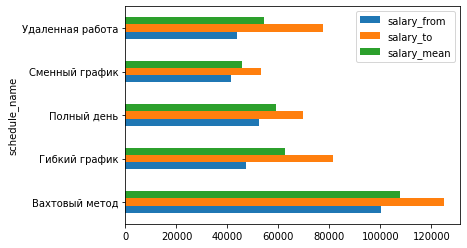

In [52]:
Data_salary_net_RUR_schedule.set_index('schedule_name').plot(kind='barh');